In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import catboost as cb

pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)

# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

Using TensorFlow backend.


In [2]:
final = pd.read_csv('data_beta.csv', index_col = 'Unnamed: 0')
model_data = final.copy()

In [3]:
model_data.head()

,trade_go,buy_from_shop,sell_to_shop,mail_come,invite,join,revival,fight,friend_num,login_count,play_time,max_level,playtime_per_day,abyss,sit_count,exp_get_amout,money_get_count,teleport_count,killed_by_pc,killed_by_npc,reborn_count,login_total_day,sit_count_perday,login_total_day.1,item_get_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count,class
0,2,72,196,21,7,58,2,0,0,259,637926,0,42528.40000,0,270,389149580,4686,376,47,30,51,15,18.000000,15,2076.600000,312.400000,0.000000,25.066667,8862,0.000009,0.000074,0.000047,0.013892,0.000589,2463.034749,610.023075,2835.226667,0.000000,0.196911,0.000000,10289.129030,0
1,1,34,111,56,16,35,0,0,0,38,401885,42,28706.07143,0,153,80119427,1596,343,32,75,75,14,10.928571,14,4398.500000,114.000000,0.000000,24.500000,69458,0.000002,0.000080,0.000187,0.172831,0.000853,10575.921050,199.359088,2050.433674,1.105263,1.973684,3.642857,68.197013,0
2,12,31,338,3,5,46,1,1,4,43,240334,38,17166.71429,0,378,142485377,1318,337,35,53,69,14,27.000000,14,1763.285714,94.142857,0.000000,24.071429,43619,0.000000,0.000146,0.000221,0.181493,0.001402,5589.162791,592.864002,1226.193878,0.883721,1.604651,9.947368,2477.670103,0
3,111,11,504,0,0,0,0,0,0,25,1205493,0,80366.20000,0,207,1377552887,7979,44,0,12,10,15,13.800000,15,7319.666667,531.933333,0.000000,2.933333,0,0.000000,0.000000,0.000010,0.000000,0.000036,48219.720000,1142.729893,5357.746667,0.000000,0.400000,0.000000,0.000000,0
4,74,68,254,35,85,98,1,25,0,110,457433,0,30495.53333,0,320,395099069,3551,568,311,109,261,15,21.333333,15,6557.866667,236.733333,0.066667,37.866667,40934,0.000000,0.000680,0.000238,0.089486,0.001242,4158.481818,863.731014,2033.035555,0.000000,2.372727,0.000000,5717.912500,0


# Create Dataset

In [4]:
x = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]

In [5]:
print(list(y).count(0))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

7500


# Basic CatBoost Test

In [6]:
clf = cb.CatBoostClassifier(task_type='CPU')

In [7]:
clf.fit(x_train, y_train)
# y_pred = clf.predict(test_x)

Learning rate set to 0.027377
0:	learn: 0.6405670	total: 144ms	remaining: 2m 23s
1:	learn: 0.5928601	total: 149ms	remaining: 1m 14s
2:	learn: 0.5517568	total: 155ms	remaining: 51.6s
3:	learn: 0.5173414	total: 161ms	remaining: 40.1s
4:	learn: 0.4843598	total: 167ms	remaining: 33.3s
5:	learn: 0.4493883	total: 173ms	remaining: 28.6s
6:	learn: 0.4250778	total: 179ms	remaining: 25.4s
7:	learn: 0.4019673	total: 185ms	remaining: 22.9s
8:	learn: 0.3776275	total: 190ms	remaining: 21s
9:	learn: 0.3546318	total: 197ms	remaining: 19.5s
10:	learn: 0.3345332	total: 203ms	remaining: 18.3s
11:	learn: 0.3164906	total: 209ms	remaining: 17.2s
12:	learn: 0.2976692	total: 215ms	remaining: 16.3s
13:	learn: 0.2831983	total: 220ms	remaining: 15.5s
14:	learn: 0.2702264	total: 226ms	remaining: 14.8s
15:	learn: 0.2564896	total: 231ms	remaining: 14.2s
16:	learn: 0.2445825	total: 237ms	remaining: 13.7s
17:	learn: 0.2327781	total: 242ms	remaining: 13.2s
18:	learn: 0.2222988	total: 248ms	remaining: 12.8s
19:	learn: 

165:	learn: 0.0588088	total: 1.07s	remaining: 5.36s
166:	learn: 0.0585328	total: 1.07s	remaining: 5.35s
167:	learn: 0.0582719	total: 1.08s	remaining: 5.34s
168:	learn: 0.0582120	total: 1.08s	remaining: 5.33s
169:	learn: 0.0581580	total: 1.09s	remaining: 5.33s
170:	learn: 0.0579680	total: 1.1s	remaining: 5.32s
171:	learn: 0.0579004	total: 1.1s	remaining: 5.31s
172:	learn: 0.0577940	total: 1.11s	remaining: 5.31s
173:	learn: 0.0576859	total: 1.11s	remaining: 5.29s
174:	learn: 0.0574852	total: 1.12s	remaining: 5.29s
175:	learn: 0.0573970	total: 1.13s	remaining: 5.28s
176:	learn: 0.0572858	total: 1.13s	remaining: 5.27s
177:	learn: 0.0572335	total: 1.14s	remaining: 5.26s
178:	learn: 0.0571939	total: 1.14s	remaining: 5.25s
179:	learn: 0.0570509	total: 1.15s	remaining: 5.24s
180:	learn: 0.0569061	total: 1.16s	remaining: 5.23s
181:	learn: 0.0567718	total: 1.16s	remaining: 5.22s
182:	learn: 0.0566890	total: 1.17s	remaining: 5.21s
183:	learn: 0.0565096	total: 1.17s	remaining: 5.21s
184:	learn: 0.

356:	learn: 0.0409992	total: 2.13s	remaining: 3.83s
357:	learn: 0.0409518	total: 2.13s	remaining: 3.82s
358:	learn: 0.0409359	total: 2.14s	remaining: 3.82s
359:	learn: 0.0409118	total: 2.14s	remaining: 3.81s
360:	learn: 0.0409005	total: 2.15s	remaining: 3.8s
361:	learn: 0.0408035	total: 2.15s	remaining: 3.8s
362:	learn: 0.0407373	total: 2.16s	remaining: 3.79s
363:	learn: 0.0407162	total: 2.16s	remaining: 3.78s
364:	learn: 0.0406408	total: 2.17s	remaining: 3.77s
365:	learn: 0.0405576	total: 2.17s	remaining: 3.77s
366:	learn: 0.0404566	total: 2.18s	remaining: 3.76s
367:	learn: 0.0402954	total: 2.19s	remaining: 3.75s
368:	learn: 0.0402744	total: 2.19s	remaining: 3.75s
369:	learn: 0.0402371	total: 2.2s	remaining: 3.74s
370:	learn: 0.0401514	total: 2.2s	remaining: 3.73s
371:	learn: 0.0400071	total: 2.21s	remaining: 3.73s
372:	learn: 0.0398922	total: 2.21s	remaining: 3.72s
373:	learn: 0.0398404	total: 2.22s	remaining: 3.71s
374:	learn: 0.0398218	total: 2.22s	remaining: 3.71s
375:	learn: 0.03

520:	learn: 0.0310808	total: 3.02s	remaining: 2.78s
521:	learn: 0.0310673	total: 3.03s	remaining: 2.77s
522:	learn: 0.0310271	total: 3.04s	remaining: 2.77s
523:	learn: 0.0309296	total: 3.04s	remaining: 2.76s
524:	learn: 0.0308875	total: 3.05s	remaining: 2.76s
525:	learn: 0.0308494	total: 3.05s	remaining: 2.75s
526:	learn: 0.0307998	total: 3.06s	remaining: 2.74s
527:	learn: 0.0307451	total: 3.06s	remaining: 2.74s
528:	learn: 0.0307298	total: 3.07s	remaining: 2.73s
529:	learn: 0.0306933	total: 3.07s	remaining: 2.73s
530:	learn: 0.0306499	total: 3.08s	remaining: 2.72s
531:	learn: 0.0305974	total: 3.08s	remaining: 2.71s
532:	learn: 0.0305038	total: 3.09s	remaining: 2.71s
533:	learn: 0.0304858	total: 3.09s	remaining: 2.7s
534:	learn: 0.0304696	total: 3.1s	remaining: 2.69s
535:	learn: 0.0304433	total: 3.1s	remaining: 2.69s
536:	learn: 0.0304085	total: 3.11s	remaining: 2.68s
537:	learn: 0.0303643	total: 3.12s	remaining: 2.67s
538:	learn: 0.0303112	total: 3.12s	remaining: 2.67s
539:	learn: 0.0

687:	learn: 0.0249841	total: 3.91s	remaining: 1.77s
688:	learn: 0.0249547	total: 3.92s	remaining: 1.77s
689:	learn: 0.0248884	total: 3.92s	remaining: 1.76s
690:	learn: 0.0248437	total: 3.93s	remaining: 1.76s
691:	learn: 0.0248082	total: 3.94s	remaining: 1.75s
692:	learn: 0.0247747	total: 3.94s	remaining: 1.75s
693:	learn: 0.0247261	total: 3.95s	remaining: 1.74s
694:	learn: 0.0247109	total: 3.95s	remaining: 1.73s
695:	learn: 0.0247032	total: 3.96s	remaining: 1.73s
696:	learn: 0.0246589	total: 3.96s	remaining: 1.72s
697:	learn: 0.0246360	total: 3.97s	remaining: 1.72s
698:	learn: 0.0245842	total: 3.97s	remaining: 1.71s
699:	learn: 0.0245755	total: 3.98s	remaining: 1.71s
700:	learn: 0.0245275	total: 3.98s	remaining: 1.7s
701:	learn: 0.0244479	total: 3.99s	remaining: 1.69s
702:	learn: 0.0244332	total: 4s	remaining: 1.69s
703:	learn: 0.0243559	total: 4s	remaining: 1.68s
704:	learn: 0.0243446	total: 4s	remaining: 1.68s
705:	learn: 0.0243187	total: 4.01s	remaining: 1.67s
706:	learn: 0.0243026	

852:	learn: 0.0194031	total: 4.8s	remaining: 827ms
853:	learn: 0.0193710	total: 4.81s	remaining: 822ms
854:	learn: 0.0193652	total: 4.81s	remaining: 816ms
855:	learn: 0.0193356	total: 4.82s	remaining: 810ms
856:	learn: 0.0192684	total: 4.82s	remaining: 805ms
857:	learn: 0.0192226	total: 4.83s	remaining: 799ms
858:	learn: 0.0192121	total: 4.83s	remaining: 793ms
859:	learn: 0.0192011	total: 4.84s	remaining: 788ms
860:	learn: 0.0191702	total: 4.84s	remaining: 782ms
861:	learn: 0.0191342	total: 4.85s	remaining: 776ms
862:	learn: 0.0190457	total: 4.86s	remaining: 771ms
863:	learn: 0.0189960	total: 4.86s	remaining: 765ms
864:	learn: 0.0189855	total: 4.87s	remaining: 759ms
865:	learn: 0.0189343	total: 4.87s	remaining: 754ms
866:	learn: 0.0189094	total: 4.88s	remaining: 748ms
867:	learn: 0.0188682	total: 4.88s	remaining: 742ms
868:	learn: 0.0188598	total: 4.89s	remaining: 737ms
869:	learn: 0.0188505	total: 4.89s	remaining: 731ms
870:	learn: 0.0188440	total: 4.9s	remaining: 726ms
871:	learn: 0.

In [8]:
y_pred = clf.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score, f1_score
print("Accuracy: %.2f" %accuracy_score(y_test, y_pred))
print("F1 score: %.2f" %f1_score(y_test, y_pred))

Accuracy: 0.98
F1 score: 0.86


# Basic Catboost Data Manipulation

In [10]:
proba_cb = clf.predict_proba(x_test)[:,1]

In [11]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((proba_cb) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
max(z1)

0.8675496688741722

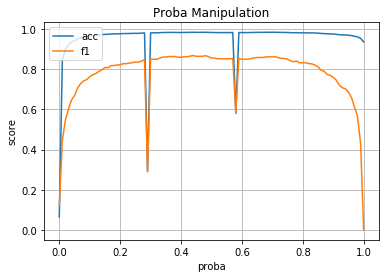

In [13]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation')
ax.legend(loc='upper left')
ax.grid()